In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-bottle-dataset/Full  Water level/Full  Water level/204569_2-kinley-mineral-water_26_11zon.jpeg
/kaggle/input/water-bottle-dataset/Full  Water level/Full  Water level/images111_199_11zon.jpeg
/kaggle/input/water-bottle-dataset/Full  Water level/Full  Water level/ill-water-transparent-bottle-still-water-isolated-white-background-154615392_74_11zon.jpeg
/kaggle/input/water-bottle-dataset/Full  Water level/Full  Water level/WhatsApp Image 2022-12-11 at 10.39.33 PM (1).jpeg
/kaggle/input/water-bottle-dataset/Full  Water level/Full  Water level/download (17)_93_11zon.jpeg
/kaggle/input/water-bottle-dataset/Full  Water level/Full  Water level/b91e250fab79ac0266463ceab378d59b--small-bottles-mineral-water_42_11zon.jpeg
/kaggle/input/water-bottle-dataset/Full  Water level/Full  Water level/small-water-bottle-clear-drinking-cold-stock-photo_csp51910427_97_11zon.jpeg
/kaggle/input/water-bottle-dataset/Full  Water level/Full  Water level/download (19)_94_11zon.jpeg
/kaggle/input

In [5]:
from PIL import Image

In [6]:
image1 = Image.open("/kaggle/input/water-bottle-dataset/Full  Water level/Full  Water level/-on-white-background-transparent-plastic-pet-bottle-of-mineral-water-2DA55DY_85_11zon.jpeg")
image2 = Image.open("/kaggle/input/water-bottle-dataset/Half water level/Half water level/1106549-hand-pouring-water-from-a-bottle-to-a-half-filled-glass_10_11zon.jpeg")
image3 = Image.open("/kaggle/input/water-bottle-dataset/Overflowing/Overflowing/download (12)_4_11zon.jpeg")


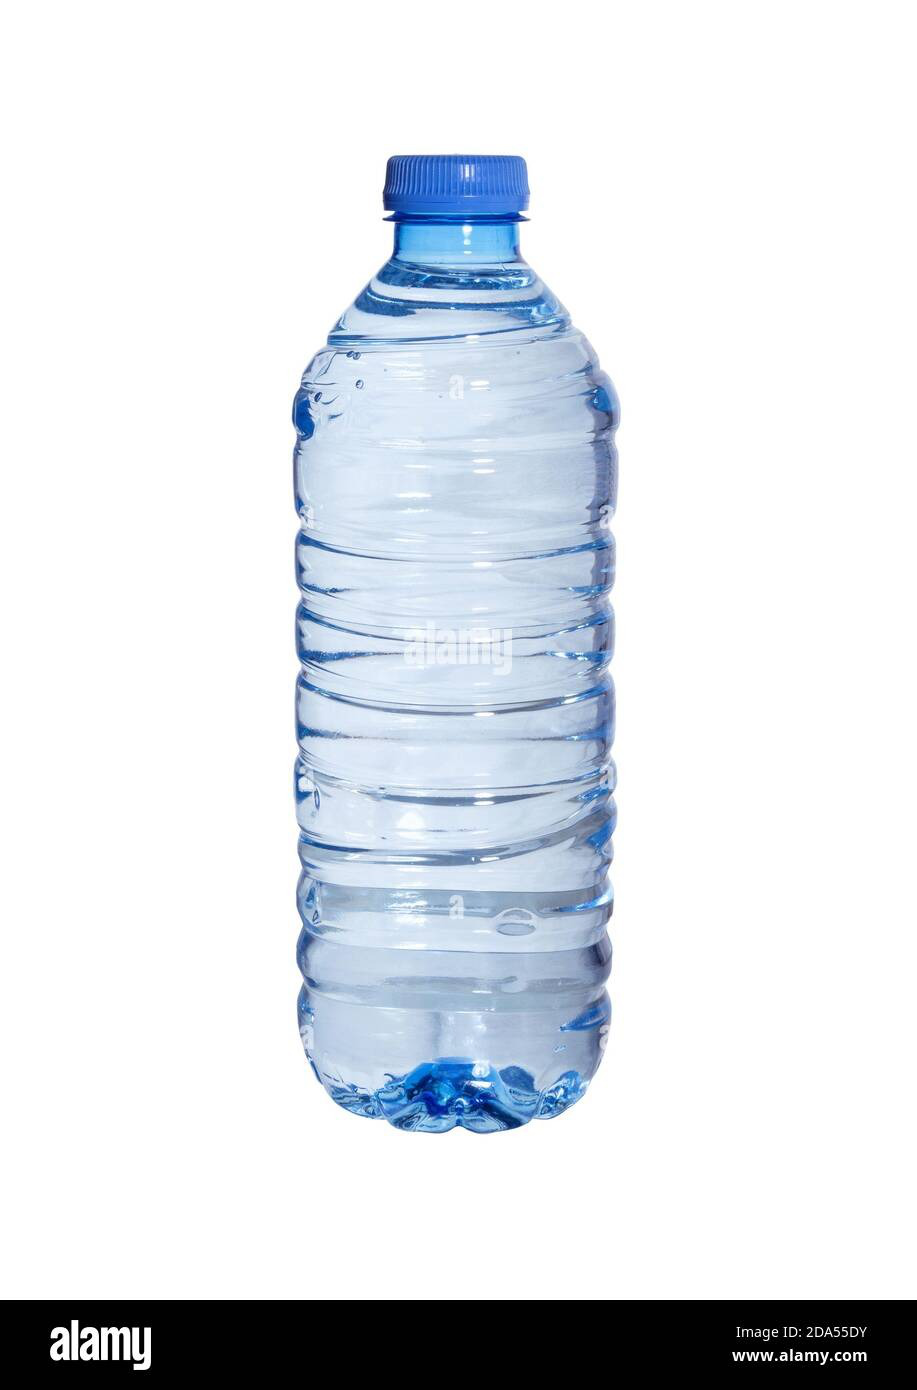

In [7]:
image1

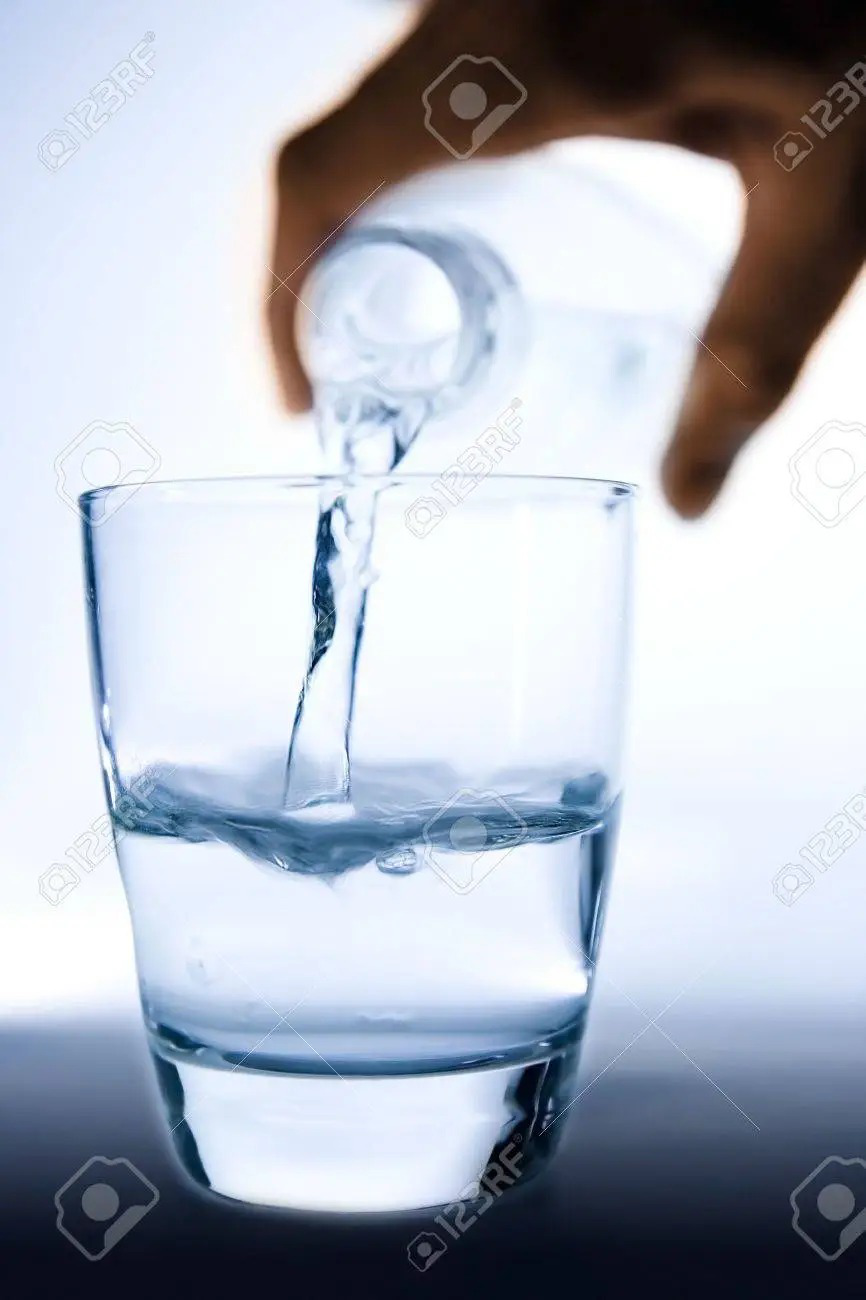

In [8]:
image2

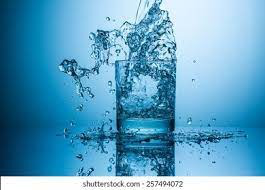

In [9]:
image3

In [10]:
image1.size, image2.size, image3.size    

((917, 1390), (866, 1300), (265, 190))

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
data = ImageDataGenerator(rescale = 1/255.0, 
                          featurewise_center=False, 
                          samplewise_center=False, featurewise_std_normalization=False, 
                          samplewise_std_normalization=False, zca_whitening=False, 
                          zca_epsilon=1e-6, rotation_range=0, width_shift_range=0., 
                          height_shift_range=0., brightness_range=None, shear_range=0., 
                          zoom_range=0., channel_shift_range=0., fill_mode='nearest', 
                          cval=0., horizontal_flip=False, vertical_flip=False, 
                          preprocessing_function=None, data_format=None, 
                          validation_split=0.2)

In [17]:
trainData = data.flow_from_directory(directory = "/kaggle/input/water-bottle-dataset", 
                                     target_size=(128, 128),class_mode='categorical', batch_size=32,shuffle=True, subset = "training")

Found 391 images belonging to 3 classes.


In [18]:
testData = data.flow_from_directory(directory = "/kaggle/input/water-bottle-dataset", 
                                    target_size=(128, 128),class_mode='categorical', batch_size=32,shuffle=True, subset = "validation")

Found 95 images belonging to 3 classes.


In [19]:
import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu", input_shape=(128,128,3)))
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(32, activation ="relu"))
model.add(Dense(64, activation ="relu"))
model.add(Dense(32, activation ="relu"))
model.add(Dense(3, activation ="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)      

In [24]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [25]:
history = model.fit(trainData, steps_per_epoch= len(trainData), epochs = 30, verbose= 1, validation_data = testData, validation_steps = len(testData))

Epoch 1/30
13/13 [==============================] - 17s 1s/step - loss: 0.9386 - accuracy: 0.5985 - val_loss: 0.9442 - val_accuracy: 0.6421
Epoch 2/30
13/13 [==============================] - 14s 1s/step - loss: 0.8334 - accuracy: 0.6317 - val_loss: 0.8467 - val_accuracy: 0.6421
Epoch 3/30
13/13 [==============================] - 13s 1s/step - loss: 0.8270 - accuracy: 0.6317 - val_loss: 0.8135 - val_accuracy: 0.6421
Epoch 4/30
13/13 [==============================] - 14s 1s/step - loss: 0.8121 - accuracy: 0.6317 - val_loss: 0.8241 - val_accuracy: 0.6421
Epoch 5/30
13/13 [==============================] - 13s 989ms/step - loss: 0.7984 - accuracy: 0.6317 - val_loss: 0.8403 - val_accuracy: 0.6421
Epoch 6/30
13/13 [==============================] - 14s 1s/step - loss: 0.7816 - accuracy: 0.6317 - val_loss: 0.8446 - val_accuracy: 0.6421
Epoch 7/30
13/13 [==============================] - 14s 1s/step - loss: 0.7502 - accuracy: 0.6547 - val_loss: 0.7664 - val_accuracy: 0.6737
Epoch 8/30
13/13 